In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# Create connection to the company_db Database.

rds_connection_string = "ETLprj:ScottSaid110!@localhost:5432/postgres"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [3]:
salaries_df= pd.read_sql_query('select * from salaries', con=engine)
titles_df = pd.read_sql_query('select * from titles', con=engine)
employees_df = pd.read_sql_query('select * from employees', con=engine)


In [4]:
salaries_df.head()

,id,emp_no,salary
0,1,10001,60117
1,2,10002,65828
2,3,10003,40006
3,4,10004,40054
4,5,10005,78228


In [5]:
titles_df.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [6]:
employees_df.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,1954-11-18,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1958-01-30,Berry,Babb,F,3/21/1992
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1/18/1991


In [7]:
max_salary = salaries_df['salary'].max()
min_salary = salaries_df['salary'].min()

print(min_salary,max_salary)

40000 129492


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E05B6E348>]],
      dtype=object)

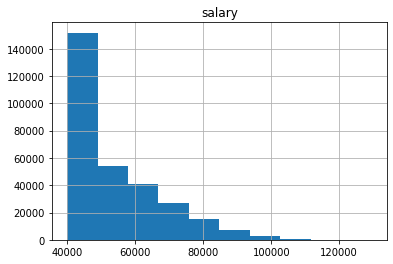

In [8]:
salaries_df.hist(column='salary')

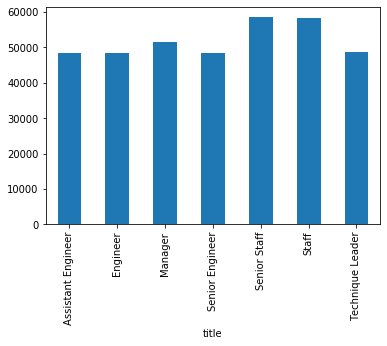

In [15]:
df_1 = pd.merge(salaries_df, employees_df[['emp_no','emp_title']], on='emp_no')
df_1 = df_1.rename(columns={'emp_title':'title_id'})
df = pd.merge(df_1,titles_df,on='title_id')
plot_df = df.groupby('title')['salary'].mean()
plot_df.plot(kind='bar')
#df.plot(kind='bar')